<div class="w3-bar w3-blue-grey w3-padding">
<div class="w3-bar-item"><h2> SAMBa Training </h2></div>
<div class="w3-bar-item w3-right"><img class="w3-image w3-right" style="width:40%;max-width:400px" src="../images/SAMBa_white.png"></div>
</div>

# Images as Matrices in Python

<table class="image">
    <caption align="bottom">This isn't even the worst pun we could have included...</caption>
    <tr><td><img src="../images/Teaching_Python_Original.png" alt="Teaching_Python: Sorry, we couldn't resist."/></td></tr>
</table>

## Setup

Before you begin these tasks, make sure you have done the following:
- Installed Python 3.6 or later (if you're reading this in Jupyter Notebook, this is taken care of!)
- Have the Python modules `numpy`, `scipy` and `matplotlib` installed
- Have downloaded the image `Teaching_Python.png`, which looks like:
    ![](../images/Teaching_Python.png)
    and know where it is stored (you can rightclick > Save Image As...). (It will be convenient for you to have the image stored in the same directory as this workbook, so that you don't need relative paths - the notebook assumes you have done this).

## Background

Image dimensions are measured in pixels - the image above has dimensions $640\times480$ pixels (width-height).
Each pixel has an associated **Red-Green-Blue (RBG)** triple associated with it, which stores the relative shades of red, green, and blue at that pixel - giving the image color.
(By contrast, a greyscale image only has one value per pixel which quantifies how dark that pixel is).
As such, any $w\times h$ RGB image can be thought of as a $h\times w\times 3$ image-matrix or array of floating-point numbers, which allows us to manipulate images on a computer.
Note that the order of $w$ and $h$ is changed as row-index is stored first in a 2D-array on a computer.

### The SVD

The **Singular Value Decomposition (SVD)** of a matrix is a powerful theoretical tool and to a more modest degree, a useful computational tool too.
For the purposes of these exercises we will introduce the SVD soley for use in image manipulation, however be aware that you will likely meet this (if you haven't already) at some point in the future and it has much more general interpretations.

Let $A\in\mathbb{R}^{m\times n}$ (a real $m\times n$ matrix), and let $K=\min\{n,m\}$. There exist orthogonal matrices $U\in\mathbb{R}^{m\times m}, V\in\mathbb{R}^{n\times n}$ and numbers $\sigma_{i}\in\mathbb{R}, i\in\{1,...,K\}$ such that $A$ has the decomposition

$$
\begin{align}
    A &= U\Sigma V^{\top} \\
    \Sigma &= \mathrm{diag}\left(\sigma_{1}, ... , \sigma_{k} \right) \in\mathbb{R}^{m\times n}.
\end{align}
$$

We call $U$ the matrix of left-singular vectors and $V$ the matrix of right-sigular vectors (these vectors span the image space and domain space of $A$, respectively) and the $\sigma_{i}$ are the singular values. We normally order the $\sigma_{i}$ such that $\vert\sigma_{i}\vert\ge\vert\sigma_{i+1}\vert$.


Note that $\Sigma$ is not necessarily square - it can be "*tall*" (has extra rows of zeros) or "*long*" (extra columns of zeros).
This decomposition is formally a theorem and has a proof which we are not going to detail, because it's long and would require some theoretical setup that we thought we'd spare you from.

Some interpretation in the context of image-matrices:
- The larger singular values can be thought of as defining "large-scale" features, whereas the smaller singular values define sharp features in the image.
- For an image array, we have a SVD for each of the fixed-RGB slices through the array. I.e: We have a "red SVD", "green SVD" and "blue SVD" for each image.
- Due to the existance of machine precision (the smallest positive number that can be stored on a computer), small singular values may fall near or below this value and a computer cannot reliably work with these values. This is a big problem when trying to invert large systems and is central to the field of *Inverse Problems*.
- If we know the SVD, we know how to construct the image. We can use the SVD to change the image for better or worse if we want.


<div class="w3-panel w3-leftbar w3-border-blue w3-pale-blue w3-padding-small">
    <h3><i class="fa fa-info-circle"></i> Exercises
</h3>
    <p>Use the empty code blocks below each task to type your solution.
You can execute the current code block using the keyboard shortcut <code>Ctrl+Enter</code>, or using the toolbar at the top of the page.</p>
<p>In addition, please run the additional code block below to setup the Notebook. These are the only additional modules you will need to complete these exercises.</p>

</div>


In [1]:
%matplotlib inline 
#This means that matplotlib will display images in this window, rather than in a new one.

import numpy as np #To use functions or constants that are in the NumPy module, type np.function_name. EG: np.pi is pi
import numpy.random as nprd #This imports random number generation functions
import scipy as sp #SciPy has lots of useful numerical methods, so we don't have to write them
import scipy.linalg as spla #This imports the sub-module containing linear algebra methods
import matplotlib.pyplot as plt #This will let us display images nicely

colours = ['red', 'green', 'blue'] #This is just so that we can label things conveniently


<div class="w3-panel w3-leftbar w3-border-yellow w3-pale-yellow w3-padding-small">
    <h3><i class="fa fa-pencil-square-o"></i> 1: Setup
</h3>
    <p>Read in the image <code>Teaching_Python</code> using <code>matplotlib</code>'s <code>imread</code> function, calling the output <code>pythonPic</code>.
This is a $64\times64\times3$ image-array.
Use <code>matplotlib.pyplot.imshow</code> and then <code>matplotlib.pyplot.show</code> to visualise the image.</p>
<p><strong>NOTE</strong>: Read the above codeblock so that you know which names the various modules have been imported under!</p>
<p>Also store the dimensions in an array <code>dims</code> using the <code>np.shape</code> command.</p>
<p><code>Teaching_Python</code> should look like the following image, possibly rescaled by <code>matplotlib</code>:</p>
<table class="image">
    <!--<caption align="bottom">The image Teaching_Python.png. As you can tell, we have been very inspired in our choice of image.</caption>-->
    <tr><td><img src="../images/Teaching_Python.png" alt="Teaching_Python"/></td></tr>
</table><p><a href="./02_python-ws-soln.ipynb#-1%3A-Setup%0A">Solution</a></p>

</div>



<div class="w3-panel w3-leftbar w3-border-yellow w3-pale-yellow w3-padding-small">
    <h3><i class="fa fa-pencil-square-o"></i> 2: Playing with Colours
</h3>
    <p>Now that the image is imported, investigate the effect of removing one of the primary (RGB) colours from the image.
As <code>pythonPic</code> is just an array, this amounts to creating a copy of the image and setting all the pixel-values for one RGB colour to be $0$. 
When you plot the image, make sure it has a title which details which manipulation has taken place (<code>plt.title</code> is the function you want, and <code>colours</code> defined above may be useful).</p>
<p>Having done this, manipulate <code>Teaching_Python</code> so that:</p>
<ul>
<li>The top-left quarter of the image is unchanged</li>
<li>The top-right quarter of the image has red removed</li>
<li>The bottom-left quarter of the image has green removed</li>
<li><p>The bottom-right quarter of the image has blue removed</p>
<p><a href="./02_python-ws-soln.ipynb#-2%3A-Playing-with-Colours%0A">Solution</a></p>
</li>
</ul>

</div>



<div class="w3-panel w3-leftbar w3-border-yellow w3-pale-yellow w3-padding-small">
    <h3><i class="fa fa-pencil-square-o"></i> 3: (Optional) Colours are Fun
</h3>
    <p>Repeat the previous task, but this time removing <em>all other</em> colours, rather than only a single one.</p>
<p><a href="./02_python-ws-soln.ipynb#-3%3A-%28Optional%29-Colours-are-Fun%0A">Solution</a></p>

</div>



<div class="w3-panel w3-leftbar w3-border-yellow w3-pale-yellow w3-padding-small">
    <h3><i class="fa fa-pencil-square-o"></i> 4: The SVD and a Low-Rank Approximation
</h3>
    <p>Write a function <code>LowRank(A, k)</code> which takes in a matrix <code>A</code> and integer <code>k</code>.
The function should return the <em>low-rank approximation</em> to the matrix <code>A</code> by truncating the SVD of <code>A</code>; i.e. <code>LowRank</code> should calculate the SVD of <code>A</code>, then construct the matrix $A_{k}$ given by:</p>
<p>$$\begin{align}
    \sigma^{\prime}_{i}&amp;:=0 \text{ for } i&gt;k,\\
    \Sigma_{k} &amp;:= \mathrm{diag}\left(\sigma_{1},...,\sigma_{k}, \sigma_{k+1}^{\prime},...,\sigma_{k}^{\prime}\right), \text{ and}\\
    A_{k} &amp;:= U\Sigma_{k}V\in\mathbb{R}^{m\times n}
\end{align}$$</p>
<p>Compute the low-rank approximation to <code>pythonPic</code>, for $k=2,5,7,10,20$, displaying each approximation. (Display <code>pythonPic</code> too, so that you can compare them.)</p>
<p>What are the reasons for wanting a low-rank approximation to an image rather than the full image?</p>
<p><a href="./02_python-ws-soln.ipynb#-4%3A-The-SVD-and-a-Low-Rank-Approximation%0A">Solution</a></p>

</div>


## Image Noise Reduction (Greyscale)

### Converting to Greyscale

We are now going to look at one of the uses for the SVD and low-rank approximations - filtering out noise from an image. Noise can arise in an image (or indeed, any data type) a number of ways, errors in communication, imprecisions when first storing the information, etc.

To prevent things from getting too complicated we are going to use a greyscale image to do this, so please run the following codeblock.
This codeblock will provide you with:
- A new image, `monoPic`, which is a greyscale version of `pythonPic`
- A function, `PlotGreyscale`, which you may use to plot the greyscale images properly. Calling `PlotGreyscale(image)` will just plot the image array `image`; if you give a second string argument such as by `PlotGreyscale(image, 'Snazzy title')`, your plot will also have the title '*Snazzy Title*'. An example call is given in the codeblock.

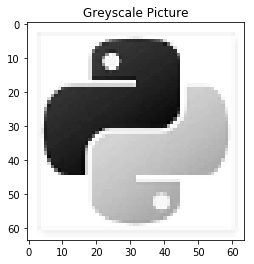

In [8]:
def RGB2Gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    grey = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return grey

def PlotGreyscale(img, titleStr=''):
    '''A function so that greyscale images plot correctly.
    Passing a second argument makes a title for the image.
    '''
    
    plt.title(titleStr)
    plt.imshow(img, cmap=plt.get_cmap('gray')) #Americanism...
    plt.show()
    
    return

monoPic = RGB2Gray(pythonPic)
PlotGreyscale(monoPic, 'Greyscale Picture')


<div class="w3-panel w3-leftbar w3-border-yellow w3-pale-yellow w3-padding-small">
    <h3><i class="fa fa-pencil-square-o"></i> 5: Image Noise Generation
</h3>
    <p>Rather than provide you with a deliberately bad image that we've added noise to earlier, we are going to add our own noise to <code>pythonPic</code> and then attempt to remove or reduce the noise to recover the original.
Adding noise to the greyscale image is as simple as adding IID random numbers to every pixel, IE every pixel in the image has a random sample from $\mathcal{N}\left(0, \xi^{2}\right)$ added to it.
Being the standard deviation of the random numbers, $\xi$ can be thought of as the "<em>noise level</em>" - the larger $\xi$ results in a noisier image.</p>
<p>Write a function <code>AddNoise(img, xi)</code> which performs the task described above. 
The input <code>img</code> is a greyscale image and <code>xi</code> is the standard deviation or noise level to be applied.
<code>AddNoise</code> should return the noisey image.</p>
<p><strong>TIP</strong>: The function <code>numpy.random.normal</code> may help. We have also already imported <code>numpy.random</code> as <code>nprd</code>.</p>
<p><a href="./02_python-ws-soln.ipynb#-5%3A-Image-Noise-Generation%0A">Solution</a></p>

</div>



<div class="w3-panel w3-leftbar w3-border-yellow w3-pale-yellow w3-padding-small">
    <h3><i class="fa fa-pencil-square-o"></i> 6: Noise Reduction
</h3>
    <p>By taking a low-rank SVD approximation to the image, we can remove some of the noisey features that we introduced earlier.
Provided the noise level isn't so high as to destroy <em>all</em> the features of the original image; the larger features of the image should still be recognisable.
As information about large features of an image is <em>encoded</em> in the largest singular values and vectors, a low-rank approximation to a noisey image should weed out some of the (small) features introduced by the noise.</p>
<p>Take $\xi=0.1$, and use <code>AddNoise</code> to add this level of noise to <code>monoPic</code>, calling the resulting noisey image <code>fuzzyPic</code>.
Starting at $k=5$ and increasing in fives up to (and including) $k=25$:</p>
<ul>
<li>Reconstruct the image in the $k$-low-rank approximations (calling it <code>resolvedPic</code>)</li>
<li>Store the error in the $L^{2}$ norm of the low-rank image and the original image, in an array called <code>errNorms</code>. That is, obtain the quantity $\vert\vert$ <code>monoPic</code>-<code>resolvedPic</code> $\vert\vert_{2}$.</li>
</ul>
<p><strong>TIP</strong>: <code>LowRank</code> from earlier may be useful, as well as <code>scipy.linalg.norm</code>.</p>
<p>Create a plot of $k$ against <code>errNorms</code>.
What do you notice about the change in image quality as $k$ increases, and around which value of $k$ is the image at it's "<em>best quality</em>"?</p>
<h4 id="(Optional)">(Optional)<a class="anchor-link" href="#(Optional)">&#182;</a></h4><p>Experiment with different noise levels, and the effectiveness of this method of noise reduction.
How do the conclusions of the previous task depend on $\xi$?</p>
<p><strong>NOTE</strong>: $\xi\geq1$ will result in this process breaking down, but feel free to experiment with it nonetheless!</p>
<p><a href="./02_python-ws-soln.ipynb#-6%3A-Noise-Reduction%0A">Solution</a></p>

</div>


<div class="w3-bar w3-blue-grey">
<a href="./01_latex-ws.ipynb" class="w3-bar-item w3-button"><h2><i class="fa fa-angle-double-left"></i> Previous</h2></a>
<a href="./00_schedule.ipynb" class="w3-bar-item w3-button w3-center" style="width:60%"><h2>Schedule</h2></a>
<a href="./03_matlab-ws.ipynb" class="w3-bar-item w3-button w3-right"><h2>Next <i class="fa fa-angle-double-right"></i></h2></a>
</div>